# Imports y definiciones

In [1]:
import pandas as pd
import pytz
import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.load_local_data import load_data

In [3]:
path = os.getcwd()
print("Current Directory", path)
 

parent_directory = os.path.dirname(path)
print("Parent Directory", parent_directory)

data_directory = parent_directory + '\data'
print("Data Directory", data_directory)

Current Directory c:\Users\elmha\OneDrive - Universidad de Chile\GitHub\Sistema_Experto_APP\notebooks
Parent Directory c:\Users\elmha\OneDrive - Universidad de Chile\GitHub\Sistema_Experto_APP
Data Directory c:\Users\elmha\OneDrive - Universidad de Chile\GitHub\Sistema_Experto_APP\data


In [4]:
local_path = data_directory + '\Horcon-etiquetado_con_1_etiqueta.csv'
df = load_data(local_path)
df.head()

Pression [cm H2O]  Temperatura [°C]  EC [µs/cm]  \
Date_Time                                                                    
2013-02-03 10:00:00-03:00              981.5             17.81         257   
2013-02-03 11:00:00-03:00              871.1             17.86           9   
2013-02-03 12:00:00-03:00              870.7             17.80           9   
2013-02-03 13:00:00-03:00             1025.5             17.71         256   
2013-02-03 14:00:00-03:00              870.3             17.84           9   

                           etiqueta conjunta  
Date_Time                                     
2013-02-03 10:00:00-03:00                  1  
2013-02-03 11:00:00-03:00                  1  
2013-02-03 12:00:00-03:00                  1  
2013-02-03 13:00:00-03:00                  1  
2013-02-03 14:00:00-03:00                  1

In [ ]:
time_window = df.loc['15-08-2015':'15-01-2017']

In [ ]:
time_window.sort_index(inplace=True)

Pression [cm H2O]  Temperatura [°C]  EC [µs/cm]  \
Date_Time                                                                    
2015-08-15 00:00:00-03:00             1251.8             15.16         299   
2015-08-15 01:00:00-03:00             1296.3             15.14         300   
2015-08-15 02:00:00-03:00             1286.1             15.05         299   
2015-08-15 03:00:00-03:00             1353.5             15.02         299   
2015-08-15 04:00:00-03:00             1353.7             14.93         299   

                           etiqueta conjunta  
Date_Time                                     
2015-08-15 00:00:00-03:00                  0  
2015-08-15 01:00:00-03:00                  0  
2015-08-15 02:00:00-03:00                  0  
2015-08-15 03:00:00-03:00                  0  
2015-08-15 04:00:00-03:00                  0

DatetimeIndex(['2015-08-15 00:00:00-03:00', '2015-08-15 01:00:00-03:00',
               '2015-08-15 02:00:00-03:00', '2015-08-15 03:00:00-03:00',
               '2015-08-15 04:00:00-03:00', '2015-08-15 05:00:00-03:00',
               '2015-08-15 06:00:00-03:00', '2015-08-15 07:00:00-03:00',
               '2015-08-15 08:00:00-03:00', '2015-08-15 09:00:00-03:00',
               ...
               '2017-01-15 14:00:00-03:00', '2017-01-15 15:00:00-03:00',
               '2017-01-15 16:00:00-03:00', '2017-01-15 17:00:00-03:00',
               '2017-01-15 18:00:00-03:00', '2017-01-15 19:00:00-03:00',
               '2017-01-15 20:00:00-03:00', '2017-01-15 21:00:00-03:00',
               '2017-01-15 22:00:00-03:00', '2017-01-15 23:00:00-03:00'],
              dtype='datetime64[ns, Chile/Continental]', name='Date_Time', length=12240, freq=None)

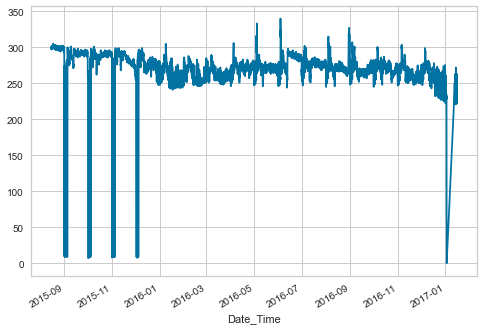

In [ ]:
time_window['EC [µs/cm]'].plot()
display(time_window.head())
time_window.index

In [9]:
a  = time_window.loc[time_window['etiqueta conjunta'] == 1] #anomaly

In [10]:
time_window.head()

Pression [cm H2O]  Temperatura [°C]  EC [µs/cm]  \
Date_Time                                                                    
2015-08-15 00:00:00-03:00             1251.8             15.16         299   
2015-08-15 01:00:00-03:00             1296.3             15.14         300   
2015-08-15 02:00:00-03:00             1286.1             15.05         299   
2015-08-15 03:00:00-03:00             1353.5             15.02         299   
2015-08-15 04:00:00-03:00             1353.7             14.93         299   

                           etiqueta conjunta  
Date_Time                                     
2015-08-15 00:00:00-03:00                  0  
2015-08-15 01:00:00-03:00                  0  
2015-08-15 02:00:00-03:00                  0  
2015-08-15 03:00:00-03:00                  0  
2015-08-15 04:00:00-03:00                  0

In [11]:
a.head()

Pression [cm H2O]  Temperatura [°C]  EC [µs/cm]  \
Date_Time                                                                    
2015-08-30 21:00:00-03:00             1380.2             14.96         296   
2015-08-30 22:00:00-03:00             1220.1             14.85         295   
2015-08-30 23:00:00-03:00             1135.7             14.98         296   
2015-08-31 00:00:00-03:00             1101.2             15.14         297   
2015-08-31 01:00:00-03:00             1314.0             15.19         300   

                           etiqueta conjunta  
Date_Time                                     
2015-08-30 21:00:00-03:00                  1  
2015-08-30 22:00:00-03:00                  1  
2015-08-30 23:00:00-03:00                  1  
2015-08-31 00:00:00-03:00                  1  
2015-08-31 01:00:00-03:00                  1

In [12]:
import plotly.graph_objects as go

figg = go.Figure()

figg.add_trace(go.Scatter(x=time_window.index, y=time_window['Pression [cm H2O]'],
                    mode='lines',
                    name='operación normal',
                    line_color='cadetblue'))
figg.add_trace(go.Scatter(x=a.index, y=a['Pression [cm H2O]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg.add_trace(go.Scatter(x=a.index, y=a['Pression [cm H2O]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))
                                        
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg.update_layout(title='Presión [cm H2O]',
                    yaxis_title='Presión [cm H2O]',
                    xaxis_title='Fecha'
)

# st.plotly_chart(figg, use_container_width=True)
figg.show()

# t = datas.loc[datas['Etiqueta T'] == 1] #anomaly

figg2 = go.Figure()

figg2.add_trace(go.Scatter(x=time_window.index, y=time_window['Temperatura [°C]'],
                    mode='lines',
                    name='operación normal',
                    line_color='darkolivegreen'))
figg2.add_trace(go.Scatter(x=a.index, y=a['Temperatura [°C]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg2.add_trace(go.Scatter(x=a.index, y=a['Temperatura [°C]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))        
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg2.update_layout(title='Temperatura [°C]',
                    yaxis_title='Temperatura [°C]',
                    xaxis_title='Fecha'
)

figg2.show()
# st.plotly_chart(figg2, use_container_width=True)

# e = datas.loc[datas['Etiqueta EC'] == 1] #anomaly
figg3 = go.Figure()

figg3.add_trace(go.Scatter(x=time_window.index, y=time_window['EC [µs/cm]'],
                    mode='lines',
                    name='operación normal',
                    line_color='darkgoldenrod'))
figg3.add_trace(go.Scatter(x=a.index, y=a['EC [µs/cm]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg3.add_trace(go.Scatter(x=a.index, y=a['EC [µs/cm]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))                     
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg3.update_layout(title='EC [µs/cm]',
                    yaxis_title='EC [µs/cm]',
                    xaxis_title='Fecha'
)


# st.plotly_chart(figg3, use_container_width=True)



In [13]:
time_window.index

DatetimeIndex(['2015-08-15 00:00:00-03:00', '2015-08-15 01:00:00-03:00',
               '2015-08-15 02:00:00-03:00', '2015-08-15 03:00:00-03:00',
               '2015-08-15 04:00:00-03:00', '2015-08-15 05:00:00-03:00',
               '2015-08-15 06:00:00-03:00', '2015-08-15 07:00:00-03:00',
               '2015-08-15 08:00:00-03:00', '2015-08-15 09:00:00-03:00',
               ...
               '2017-01-15 14:00:00-03:00', '2017-01-15 15:00:00-03:00',
               '2017-01-15 16:00:00-03:00', '2017-01-15 17:00:00-03:00',
               '2017-01-15 18:00:00-03:00', '2017-01-15 19:00:00-03:00',
               '2017-01-15 20:00:00-03:00', '2017-01-15 21:00:00-03:00',
               '2017-01-15 22:00:00-03:00', '2017-01-15 23:00:00-03:00'],
              dtype='datetime64[ns, Chile/Continental]', name='Date_Time', length=12240, freq=None)

# Separación datos

Se entrena con los datos hasta el 30 de septiembre y se utiliza el conjunto de test desde el 1 de octubre en adelante.

In [14]:
train = time_window.loc[:'2016-09-30']

# mask = (df['date'] > '2016-09-1') & (df['date'] <= '2000-6-10')

test = time_window.loc['2016-10-01':]

In [15]:
test

Pression [cm H2O]  Temperatura [°C]  EC [µs/cm]  \
Date_Time                                                                    
2016-10-01 00:00:00-03:00             1341.5             16.60         269   
2016-10-01 01:00:00-03:00             1307.8             16.63         278   
2016-10-01 02:00:00-03:00             1328.0             16.61         272   
2016-10-01 03:00:00-03:00             1365.7             16.61         269   
2016-10-01 04:00:00-03:00             1354.7             16.63         270   
...                                      ...               ...         ...   
2017-01-15 19:00:00-03:00             1356.8             17.04         263   
2017-01-15 20:00:00-03:00             1232.2             17.02         226   
2017-01-15 21:00:00-03:00             1256.7             17.10         223   
2017-01-15 22:00:00-03:00             1332.4             17.06         248   
2017-01-15 23:00:00-03:00             1360.6             17.02         231   

                           etiqueta conjunta  
Date_Time                                     
2016-10-01 00:00:00-03:00                  0  
2016-10-01 01:00:00-03:00                  0  
2016-10-01 02:00:00-03:00                  0  
2016-10-01 03:00:00-03:00                  0  
2016-10-01 04:00:00-03:00                  0  
...                                      ...  
2017-01-15 19:00:00-03:00                  0  
2017-01-15 20:00:00-03:00                  0  
2017-01-15 21:00:00-03:00                  0  
2017-01-15 22:00:00-03:00                  0  
2017-01-15 23:00:00-03:00                  0  

[2328 rows x 4 columns]

In [16]:
train

Pression [cm H2O]  Temperatura [°C]  EC [µs/cm]  \
Date_Time                                                                    
2015-08-15 00:00:00-03:00             1251.8             15.16         299   
2015-08-15 01:00:00-03:00             1296.3             15.14         300   
2015-08-15 02:00:00-03:00             1286.1             15.05         299   
2015-08-15 03:00:00-03:00             1353.5             15.02         299   
2015-08-15 04:00:00-03:00             1353.7             14.93         299   
...                                      ...               ...         ...   
2016-09-30 19:00:00-03:00             1414.1             15.32         270   
2016-09-30 20:00:00-03:00             1413.8             15.29         269   
2016-09-30 21:00:00-03:00             1331.9             16.62         282   
2016-09-30 22:00:00-03:00             1230.3             16.58         268   
2016-09-30 23:00:00-03:00             1344.2             16.64         280   

                           etiqueta conjunta  
Date_Time                                     
2015-08-15 00:00:00-03:00                  0  
2015-08-15 01:00:00-03:00                  0  
2015-08-15 02:00:00-03:00                  0  
2015-08-15 03:00:00-03:00                  0  
2015-08-15 04:00:00-03:00                  0  
...                                      ...  
2016-09-30 19:00:00-03:00                  0  
2016-09-30 20:00:00-03:00                  0  
2016-09-30 21:00:00-03:00                  0  
2016-09-30 22:00:00-03:00                  0  
2016-09-30 23:00:00-03:00                  0  

[9912 rows x 4 columns]

In [17]:
test

Pression [cm H2O]  Temperatura [°C]  EC [µs/cm]  \
Date_Time                                                                    
2016-10-01 00:00:00-03:00             1341.5             16.60         269   
2016-10-01 01:00:00-03:00             1307.8             16.63         278   
2016-10-01 02:00:00-03:00             1328.0             16.61         272   
2016-10-01 03:00:00-03:00             1365.7             16.61         269   
2016-10-01 04:00:00-03:00             1354.7             16.63         270   
...                                      ...               ...         ...   
2017-01-15 19:00:00-03:00             1356.8             17.04         263   
2017-01-15 20:00:00-03:00             1232.2             17.02         226   
2017-01-15 21:00:00-03:00             1256.7             17.10         223   
2017-01-15 22:00:00-03:00             1332.4             17.06         248   
2017-01-15 23:00:00-03:00             1360.6             17.02         231   

                           etiqueta conjunta  
Date_Time                                     
2016-10-01 00:00:00-03:00                  0  
2016-10-01 01:00:00-03:00                  0  
2016-10-01 02:00:00-03:00                  0  
2016-10-01 03:00:00-03:00                  0  
2016-10-01 04:00:00-03:00                  0  
...                                      ...  
2017-01-15 19:00:00-03:00                  0  
2017-01-15 20:00:00-03:00                  0  
2017-01-15 21:00:00-03:00                  0  
2017-01-15 22:00:00-03:00                  0  
2017-01-15 23:00:00-03:00                  0  

[2328 rows x 4 columns]

In [ ]:
import plotly.graph_objects as go

b = test.loc[test['etiqueta conjunta']==1]

figg = go.Figure()


figg.add_trace(go.Scatter(x=time_window.index, y=test['Pression [cm H2O]'],
                    mode='lines',
                    name='operación normal',
                    line_color='cadetblue'))
figg.add_trace(go.Scatter(x=a.index, y=a['Pression [cm H2O]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg.add_trace(go.Scatter(x=a.index, y=a['Pression [cm H2O]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))
                                        
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg.update_layout(title='Presión [cm H2O]',
                    yaxis_title='Presión [cm H2O]',
                    xaxis_title='Fecha'
)

# st.plotly_chart(figg, use_container_width=True)
figg.show()

# t = datas.loc[datas['Etiqueta T'] == 1] #anomaly

figg2 = go.Figure()

figg2.add_trace(go.Scatter(x=time_window.index, y=time_window['Temperatura [°C]'],
                    mode='lines',
                    name='operación normal',
                    line_color='darkolivegreen'))
figg2.add_trace(go.Scatter(x=a.index, y=a['Temperatura [°C]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg2.add_trace(go.Scatter(x=a.index, y=a['Temperatura [°C]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))        
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg2.update_layout(title='Temperatura [°C]',
                    yaxis_title='Temperatura [°C]',
                    xaxis_title='Fecha'
)

figg2.show()
# st.plotly_chart(figg2, use_container_width=True)

# e = datas.loc[datas['Etiqueta EC'] == 1] #anomaly
figg3 = go.Figure()

figg3.add_trace(go.Scatter(x=time_window.index, y=time_window['EC [µs/cm]'],
                    mode='lines',
                    name='operación normal',
                    line_color='darkgoldenrod'))
figg3.add_trace(go.Scatter(x=a.index, y=a['EC [µs/cm]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg3.add_trace(go.Scatter(x=a.index, y=a['EC [µs/cm]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))                     
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg3.update_layout(title='EC [µs/cm]',
                    yaxis_title='EC [µs/cm]',
                    xaxis_title='Fecha'
)


# st.plotly_chart(figg3, use_container_width=True)



In [ ]:
v

# Entrenamiento de modelos

In [18]:
from pycaret.classification import *

# s = setup(train, target = 'etiqueta conjunta', test_data = test, session_id = 123, silent = True, use_gpu = True)
s = setup(train, target = 'etiqueta conjunta', session_id = 123, silent = True, use_gpu = True, train_size=0.8)

In [19]:

# compare all baseline models and select top 5
top5 = compare_models(n_select = 5) 
# tune top 5 base models
tuned_top5 = [tune_model(i,fold = 5, optimize='Recall',search_library='scikit-optimize') for i in top5]
# ensemble top 5 tuned models
# bagged_top5 = [ensemble_model(i) for i in tuned_top5]
# blend top 5 base models 
# blender = blend_models(estimator_list = top5) 
# stack top 5 models
stacker = stack_models(estimator_list = top5[1:], meta_model = top5[0])
# select best model 
# best = automl(optimize = 'Recall')

In [37]:
top5[4]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [20]:

last_grid_optimized_stacked = pull()
last_grid_optimized_stacked 


Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9571  0.9733  0.6351  0.8704  0.7344  0.7117  0.7221
1       0.9672  0.9723  0.7568  0.8750  0.8116  0.7937  0.7963
2       0.9798  0.9883  0.8514  0.9265  0.8873  0.8763  0.8772
3       0.9735  0.9920  0.8243  0.8841  0.8531  0.8386  0.8392
4       0.9634  0.9700  0.7297  0.8571  0.7883  0.7684  0.7714
5       0.9735  0.9786  0.7838  0.9206  0.8467  0.8323  0.8356
6       0.9773  0.9918  0.8514  0.9000  0.8750  0.8625  0.8629
7       0.9786  0.9948  0.8533  0.9143  0.8828  0.8710  0.8716
8       0.9798  0.9880  0.8533  0.9275  0.8889  0.8778  0.8787
9       0.9646  0.9841  0.7568  0.8485  0.8000  0.7807  0.7822
Mean    0.9715  0.9833  0.7896  0.8924  0.8368  0.8213  0.8237
SD      0.0075  0.0087  0.0683  0.0279  0.0490  0.0529  0.0506

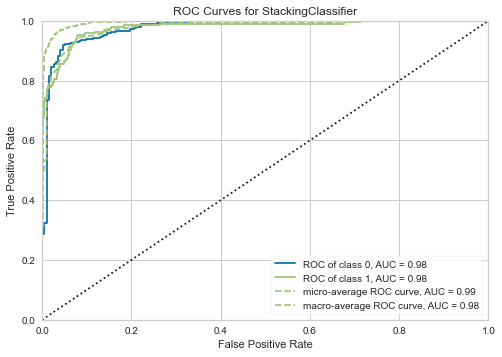

In [21]:
plot_model(stacker)

In [22]:
save_model(stacker,'stack inicial')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='etiqueta conjunta',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                                                                       min_impurity_decrease=0.0,
                                                                       min_impurity_split=None,
                                        

In [23]:
save_model(stacker,'stack inicial 2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='etiqueta conjunta',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                                                                       min_impurity_decrease=0.0,
                                                                       min_impurity_split=None,
                                        

In [24]:
from pycaret.classification import load_model
saved_1_stack = load_model('stack_inicial')


Transformation Pipeline and Model Successfully Loaded


In [25]:

saved__stack = load_model('stack_inicial')


Transformation Pipeline and Model Successfully Loaded


In [26]:
stack_finalizado = finalize_model(stacker)
save_model(stack_finalizado,'stack_finalizado')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='etiqueta conjunta',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                                                                       min_impurity_decrease=0.0,
                                                                       min_impurity_split=None,
                                        

In [27]:
pull()

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9571  0.9733  0.6351  0.8704  0.7344  0.7117  0.7221
1       0.9672  0.9723  0.7568  0.8750  0.8116  0.7937  0.7963
2       0.9798  0.9883  0.8514  0.9265  0.8873  0.8763  0.8772
3       0.9735  0.9920  0.8243  0.8841  0.8531  0.8386  0.8392
4       0.9634  0.9700  0.7297  0.8571  0.7883  0.7684  0.7714
5       0.9735  0.9786  0.7838  0.9206  0.8467  0.8323  0.8356
6       0.9773  0.9918  0.8514  0.9000  0.8750  0.8625  0.8629
7       0.9786  0.9948  0.8533  0.9143  0.8828  0.8710  0.8716
8       0.9798  0.9880  0.8533  0.9275  0.8889  0.8778  0.8787
9       0.9646  0.9841  0.7568  0.8485  0.8000  0.7807  0.7822
Mean    0.9715  0.9833  0.7896  0.8924  0.8368  0.8213  0.8237
SD      0.0075  0.0087  0.0683  0.0279  0.0490  0.0529  0.0506

In [28]:
automl(optimize='F1',use_holdout=True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [29]:
leaderboard = get_leaderboard()
leaderboard

Model Name  \
Index                                    
0                  Logistic Regression   
1               K Neighbors Classifier   
2                          Naive Bayes   
3             Decision Tree Classifier   
4                  SVM - Linear Kernel   
5                     Ridge Classifier   
6             Random Forest Classifier   
7      Quadratic Discriminant Analysis   
8                 Ada Boost Classifier   
9         Gradient Boosting Classifier   
10        Linear Discriminant Analysis   
11              Extra Trees Classifier   
12           Extreme Gradient Boosting   
13     Light Gradient Boosting Machine   
14                 CatBoost Classifier   
15                    Dummy Classifier   
16                 CatBoost Classifier   
17     Light Gradient Boosting Machine   
18           Extreme Gradient Boosting   
19            Random Forest Classifier   
20              Extra Trees Classifier   
21                 Stacking Classifier   

                                                   Model  Accuracy     AUC  \
Index                                                                        
0      (DataTypes_Auto_infer(categorical_features=[],...    0.9064  0.5679   
1      (DataTypes_Auto_infer(categorical_features=[],...    0.9296  0.7740   
2      (DataTypes_Auto_infer(categorical_features=[],...    0.9158  0.7053   
3      (DataTypes_Auto_infer(categorical_features=[],...    0.9605  0.8869   
4      (DataTypes_Auto_infer(categorical_features=[],...    0.8208  0.0000   
5      (DataTypes_Auto_infer(categorical_features=[],...    0.9064  0.0000   
6      (DataTypes_Auto_infer(categorical_features=[],...    0.9673  0.9763   
7      (DataTypes_Auto_infer(categorical_features=[],...    0.9246  0.7874   
8      (DataTypes_Auto_infer(categorical_features=[],...    0.9443  0.9222   
9      (DataTypes_Auto_infer(categorical_features=[],...    0.9617  0.9682   
10     (DataTypes_Auto_infer(categorical_features=[],...    0.9139  0.5008   
11     (DataTypes_Auto_infer(categorical_features=[],...    0.9661  0.9745   
12     (DataTypes_Auto_infer(categorical_features=[],...    0.9697  0.9806   
13     (DataTypes_Auto_infer(categorical_features=[],...    0.9707  0.9818   
14     (DataTypes_Auto_infer(categorical_features=[],...    0.9712  0.9841   
15     (DataTypes_Auto_infer(categorical_features=[],...    0.9064  0.5000   
16     (DataTypes_Auto_infer(categorical_features=[],...    0.9561  0.9397   
17     (DataTypes_Auto_infer(categorical_features=[],...    0.9305  0.8970   
18     (DataTypes_Auto_infer(categorical_features=[],...    0.0957  0.8739   
19     (DataTypes_Auto_infer(categorical_features=[],...    0.9398  0.9674   
20     (DataTypes_Auto_infer(categorical_features=[],...    0.9381  0.9512   
21     (DataTypes_Auto_infer(categorical_features=[],...    0.9715  0.9833   

       Recall   Prec.      F1   Kappa     MCC  
Index                                          
0      0.0000  0.0000  0.0000  0.0000  0.0000  
1      0.3383  0.7911  0.4719  0.4408  0.4877  
2      0.1334  0.8105  0.2280  0.2070  0.3061  
3      0.7963  0.7843  0.7890  0.7673  0.7680  
4      0.1485  0.3695  0.0896  0.0578  0.1005  
5      0.0000  0.0000  0.0000  0.0000  0.0000  
6      0.7236  0.9082  0.8037  0.7862  0.7932  
7      0.2009  0.9711  0.3300  0.3084  0.4200  
8      0.4906  0.8509  0.6196  0.5921  0.6197  
9      0.6456  0.9207  0.7562  0.7363  0.7514  
10     0.0796  1.0000  0.1468  0.1350  0.2674  
11     0.7129  0.9044  0.7960  0.7778  0.7851  
12     0.7303  0.9308  0.8167  0.8006  0.8085  
13     0.7681  0.9056  0.8290  0.8132  0.8177  
14     0.7493  0.9300  0.8281  0.8127  0.8193  
15     0.0000  0.0000  0.0000  0.0000  0.0000  
16     0.5768  0.9265  0.7099  0.6876  0.7108  
17     0.2924  0.8967  0.4398  0.4129  0.4883  
18     1.0000  0.0938  0.1715  0.0004  0.0112  
19     0.8087  0.6483  0.7171  0.6841  0.6909  
20     0.8181  0.6307  0.7112  0.6772  0.6851  
21     0.7896  0.8924  0.8368  0.8213  0.8

# Over-sampling in anomaly detected windows

## Interpolación 

In [30]:
train_upsampled=test.resample('300S')
train_upsampled.sum()


Pression [cm H2O]  Temperatura [°C]  EC [µs/cm]  \
Date_Time                                                                    
2016-10-01 00:00:00-03:00             1341.5             16.60         269   
2016-10-01 00:05:00-03:00                0.0              0.00           0   
2016-10-01 00:10:00-03:00                0.0              0.00           0   
2016-10-01 00:15:00-03:00                0.0              0.00           0   
2016-10-01 00:20:00-03:00                0.0              0.00           0   
...                                      ...               ...         ...   
2017-01-15 22:40:00-03:00                0.0              0.00           0   
2017-01-15 22:45:00-03:00                0.0              0.00           0   
2017-01-15 22:50:00-03:00                0.0              0.00           0   
2017-01-15 22:55:00-03:00                0.0              0.00           0   
2017-01-15 23:00:00-03:00             1360.6             17.02         231   

                           etiqueta conjunta  
Date_Time                                     
2016-10-01 00:00:00-03:00                  0  
2016-10-01 00:05:00-03:00                  0  
2016-10-01 00:10:00-03:00                  0  
2016-10-01 00:15:00-03:00                  0  
2016-10-01 00:20:00-03:00                  0  
...                                      ...  
2017-01-15 22:40:00-03:00                  0  
2017-01-15 22:45:00-03:00                  0  
2017-01-15 22:50:00-03:00                  0  
2017-01-15 22:55:00-03:00                  0  
2017-01-15 23:00:00-03:00                  0  

[30805 rows x 4 columns]

In [31]:
train_interpolated = train_upsampled.interpolate(method='linear')
train_interpolated.drop_duplicates(inplace=True)

# Se guardan los datos interpolados dadas por etiquetas manuales
train_interpolated.to_csv('train_interpolated')

Pression [cm H2O]  Temperatura [°C]  EC [µs/cm]  \
Date_Time                                                                    
2016-10-01 00:00:00-03:00        1341.500000         16.600000  269.000000   
2016-10-01 00:05:00-03:00        1338.691667         16.602500  269.750000   
2016-10-01 00:10:00-03:00        1335.883333         16.605000  270.500000   
2016-10-01 00:15:00-03:00        1333.075000         16.607500  271.250000   
2016-10-01 00:20:00-03:00        1330.266667         16.610000  272.000000   
...                                      ...               ...         ...   
2017-01-15 22:40:00-03:00        1351.200000         17.033333  236.666667   
2017-01-15 22:45:00-03:00        1353.550000         17.030000  235.250000   
2017-01-15 22:50:00-03:00        1355.900000         17.026667  233.833333   
2017-01-15 22:55:00-03:00        1358.250000         17.023333  232.416667   
2017-01-15 23:00:00-03:00        1360.600000         17.020000  231.000000   

                           etiqueta conjunta  
Date_Time                                     
2016-10-01 00:00:00-03:00                0.0  
2016-10-01 00:05:00-03:00                0.0  
2016-10-01 00:10:00-03:00                0.0  
2016-10-01 00:15:00-03:00                0.0  
2016-10-01 00:20:00-03:00                0.0  
...                                      ...  
2017-01-15 22:40:00-03:00                0.0  
2017-01-15 22:45:00-03:00                0.0  
2017-01-15 22:50:00-03:00                0.0  
2017-01-15 22:55:00-03:00                0.0  
2017-01-15 23:00:00-03:00                0.0  

[30805 rows x 4 columns]

In [32]:
e = test2.loc[test2['etiqueta conjunta'] == 1] #anomaly
p = test2.loc[test2['an'] == 1] #anomaly
n = test2.loc[test2['an'] == 0] #anomaly

NameError: name 'test2' is not defined

In [ ]:
# train_upsampled -> conjunto 

final = n.copy()
print('final (test_normales)', final.shape)

print('p.shape (test_anomalías)', p.shape)



for i in p.index:
    j = i+pd.Timedelta('1H')
    final = pd.concat([final,interpolated.loc[i:j]])

print('final después',final.shape)

final (test_normales) (2113, 5)
p.shape (test_anomalías) (215, 5)
final después (4908, 5)


In [ ]:
final.sort_index(inplace=True)

print('final después',final.shape)

final después (4908, 5)


In [ ]:
final.drop_duplicates(inplace=True)

print('final después de remover duplicados', final.shape)


final después de remover duplicados (4694, 5)
